In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input, BatchNormalization

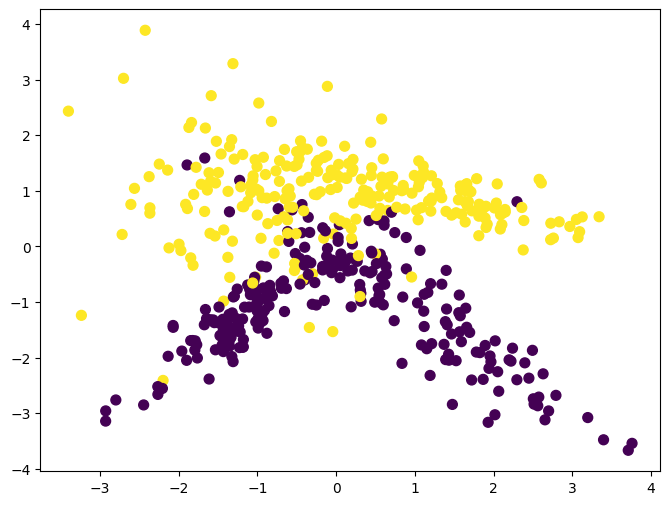

In [3]:
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(
    n_samples=500,             # Approximate number of points in your image
    n_features=2,              # 2D data (for the X and Y axes)
    n_informative=2,           # Both features contain useful information
    n_redundant=0,             # No useless/repeated features
    n_repeated=0,
    n_classes=2,               # Two classes (Purple and Yellow)
    n_clusters_per_class=2,    # KEY PARAMETER: Creates the multiple blobs seen in the image
    weights=[0.5, 0.5],        # Balanced classes
    class_sep=1.0,             # Controls how separated the clusters are
    random_state=14            # Fixed seed to reproduce a similar specific shape
)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.show()

# without batch normalization

In [5]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.4925 - loss: 0.6898 - val_accuracy: 0.4300 - val_loss: 0.6907
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5150 - loss: 0.6883 - val_accuracy: 0.4300 - val_loss: 0.6899
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5150 - loss: 0.6868 - val_accuracy: 0.4300 - val_loss: 0.6891
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5150 - loss: 0.6851 - val_accuracy: 0.4300 - val_loss: 0.6881
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5150 - loss: 0.6835 - val_accuracy: 0.4300 - val_loss: 0.6868
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5150 - loss: 0.6817 - val_accuracy: 0.4300 - val_loss: 0.6853
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5150 - loss: 0.6794 - val_accuracy: 0.4300 - val_loss: 0.6834
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5150 - loss: 0.6778 - val_accuracy: 0.

# with batch normalization

In [7]:
model = Sequential()

model.add(Input(shape=(2,)))
model.add(Dense(3,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3625 - loss: 0.7996 - val_accuracy: 0.4400 - val_loss: 0.7327
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3825 - loss: 0.7719 - val_accuracy: 0.4200 - val_loss: 0.7248
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4000 - loss: 0.7521 - val_accuracy: 0.4800 - val_loss: 0.7163
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4375 - loss: 0.7312 - val_accuracy: 0.5500 - val_loss: 0.7094
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4775 - loss: 0.7051 - val_accuracy: 0.5100 - val_loss: 0.7021
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4750 - loss: 0.7053 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5550 - loss: 0.6827 - val_accuracy: 0.4900 - val_loss: 0.6879
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5425 - loss: 0.6755 - val_accuracy: 0.

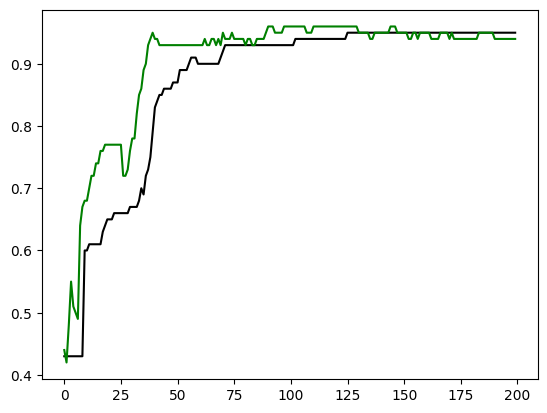

In [10]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green') # batch normalization

# we can clearly see incase of batch normalization we faster converge toward solution (faster convegence)